# Iris 종류 분류 (Multiclass)
Class가 여러개인 데이터를 Logistic Regression으로 예측

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Data Load
데이터는 sklearn.datasets의 load_iris 함수를 이용해 받을 수 있음 

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

데이터에서 사용되는 변수는 암술과 수술의 길이와 넓이  
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

In [4]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

정답은 iris 꽃의 종류

In [5]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
data, target = iris["data"], iris["target"]

In [7]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 1.2 데이터 EDA
데이터의 분포를 확인하면 다음과 같음  

In [9]:
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


정답의 종류별 개수

In [10]:
pd.Series(target).value_counts()

0    50
1    50
2    50
dtype: int64

### 1.3 Data Split
데이터를 train과 test로 나누기

In [11]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [12]:
print(f"train data 개수: {len(train_data)}")
print(f"test data 개수: {len(test_data)}")

train data 개수: 105
test data 개수: 45


Train 데이터 정답 개수 분포

In [13]:
pd.Series(train_target).value_counts()

2    38
1    34
0    33
dtype: int64

Test 데이터 정답 개수 분포

In [14]:
pd.Series(test_target).value_counts()

0    17
1    16
2    12
dtype: int64

단순히 데이터를 분류할 경우 원래 데이터의 target 분포를 반영하지 못함  
이 때 사용할 수 있는 것이 `stratify` 옵션  
이 옵션에 데이터의 label을 넣어주면 원본 데이터의 정답 분포를 반영해 데이터를 나눠줌

In [15]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021, stratify=target
)

In [16]:
pd.Series(train_target).value_counts()

0    35
2    35
1    35
dtype: int64

In [17]:
pd.Series(test_target).value_counts()

0    15
2    15
1    15
dtype: int64

## Multiclass

In [21]:
from sklearn.linear_model import LogisticRegression

시각화를 위해서 Sepal length와 Sepal width만 사용

In [22]:
X = train_data[:, :2]

In [23]:
X[0]

array([5.1, 3.3])

데이터를 시각화하면 아래와 같음

(1.5, 4.9)

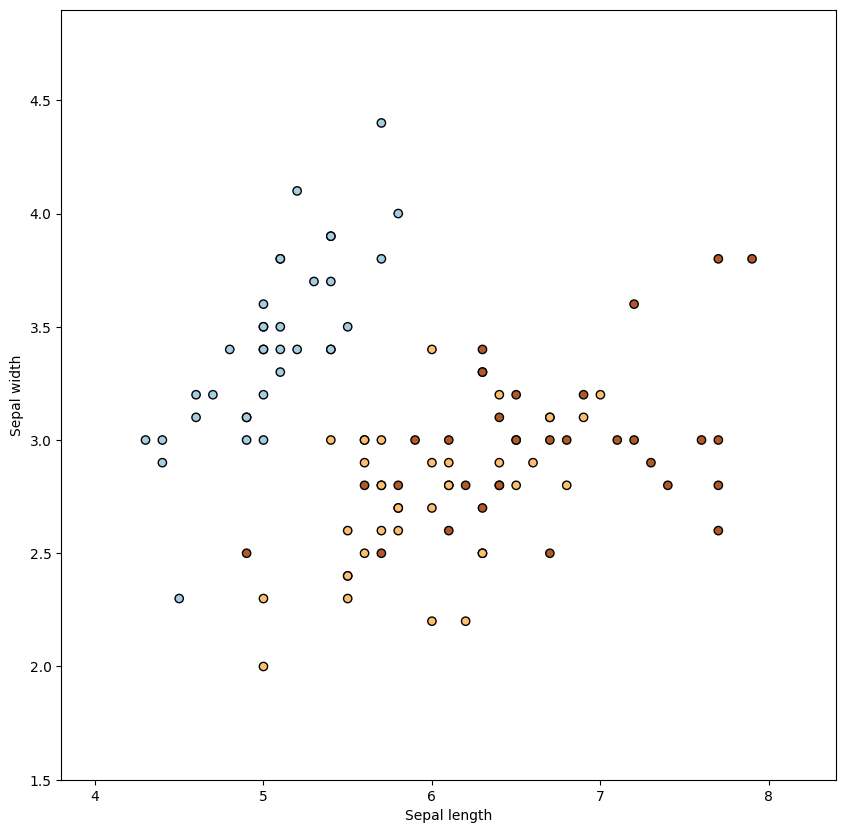

In [24]:
plt.figure(1, figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=train_target, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)

### 2.1 One vs Rest
One vs Rest 방법의 Logistic Regression 학습

In [25]:
ovr_logit = LogisticRegression(multi_class="ovr")
ovr_logit.fit(X, train_target)

LogisticRegression(multi_class='ovr')

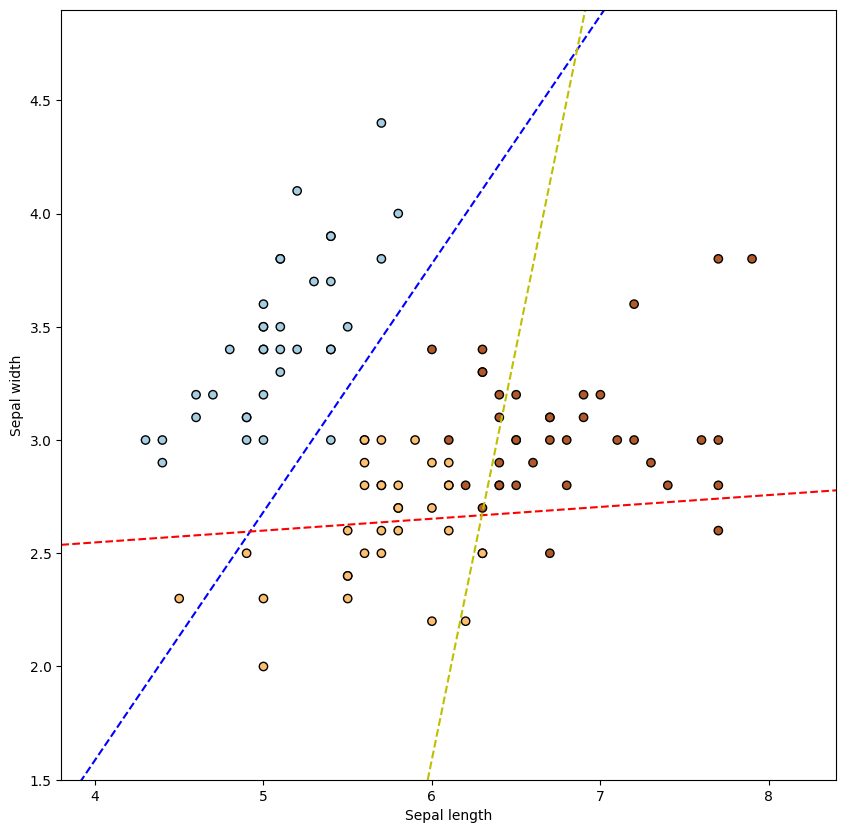

In [28]:
# 시각화

x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
plt.figure(1, figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=ovr_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = ovr_logit.coef_
intercept = ovr_logit.intercept_

def plot_hyperplane(c, color):
  def line(x0):
    return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
  plt.plot([x_min, x_max], [line(x_min), line(x_max)], ls="--", color=color)

for i, color in zip(ovr_logit.classes_, "bry"):
  plot_hyperplane(i, color)

시각화에 따르면 파랑, 빨강, 노란 선을 기준으로 데이터가 파랑, 빨강 노랑에 해당하는 지 여부를 판가름

### 2.2 Multinomial
정답의 분포가 multinomial 분포를 따른다고 가정한 후 시행하는 Multiclass Logistic Regression  
LogisticRegression의 기본 값은 "multinomial"임

In [29]:
multi_logit = LogisticRegression(multi_class="multinomial")
multi_logit.fit(X, train_target)

LogisticRegression(multi_class='multinomial')

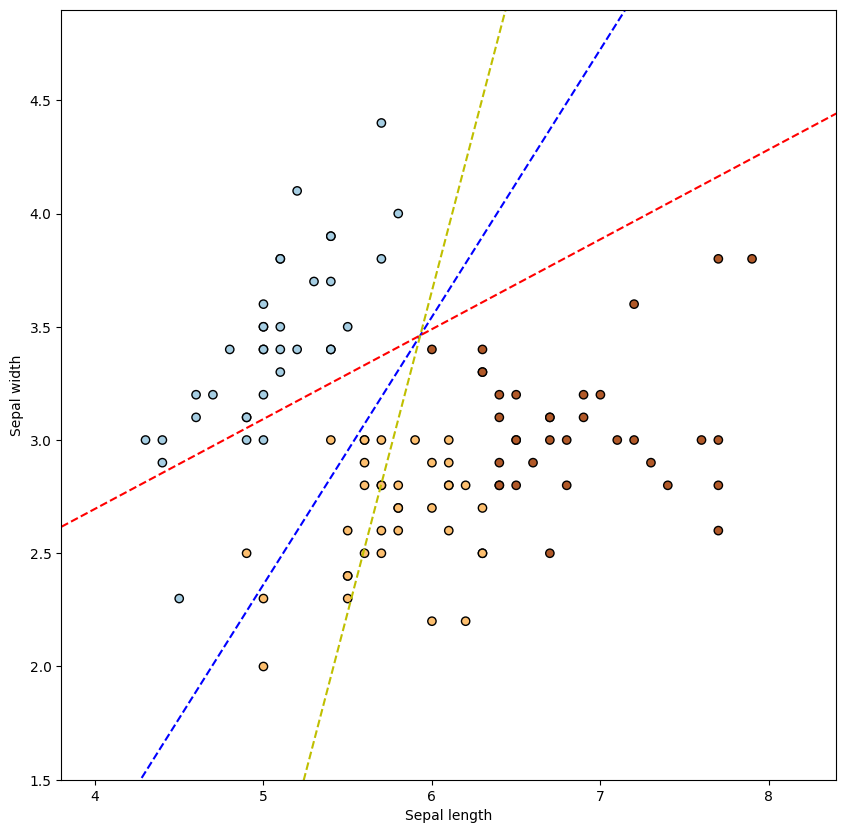

In [31]:
# 시각화

x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
plt.figure(1, figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=multi_logit.predict(X), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = multi_logit.coef_
intercept = multi_logit.intercept_

def plot_hyperplane(c, color):
  def line(x0):
    return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
  plt.plot([x_min, x_max], [line(x_min), line(x_max)], ls="--", color=color)

for i, color in zip(multi_logit.classes_, "bry"):
  plot_hyperplane(i, color)

## 2. Logistic Regression (Multinomial)

In [32]:
multi_logit = LogisticRegression()

### 3.1 학습

In [33]:
multi_logit.fit(train_data, train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 3.2 예측

In [34]:
train_pred_proba = multi_logit.predict_proba(train_data)

In [35]:
sample_pred = train_pred_proba[0]
sample_pred

array([9.49673805e-01, 5.03248024e-02, 1.39211469e-06])

In [36]:
print(f"class 0에 속하지 않을 확률: {1 - sample_pred[0]:.4f}")
print(f"class 1과 2에 속할 확률: {sample_pred[1:].sum():.4f}")

class 0에 속하지 않을 확률: 0.0503
class 1과 2에 속할 확률: 0.0503


In [37]:
train_pred = multi_logit.predict(train_data)
test_pred = multi_logit.predict(test_data)

### 3.3 평가

In [38]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

In [39]:
print(f"Train accuracy is: {train_acc:.2f}")
print(f"Test accuracy is: {test_acc:.2f}")

Train accuracy is: 0.98
Test accuracy is: 0.91


## 4. Logistic Regression (OVR)

In [40]:
ovr_logit = LogisticRegression(multi_class="ovr")

### 4.1 학습

In [41]:
ovr_logit.fit(train_data, train_target)

LogisticRegression(multi_class='ovr')

### 4.2 예측

In [42]:
ovr_train_pred = ovr_logit.predict(train_data)
ovr_test_pred = ovr_logit.predict(test_data)

### 4.3 평가

In [43]:
from sklearn.metrics import accuracy_score

ovr_train_acc = accuracy_score(train_target, ovr_train_pred)
ovr_test_acc = accuracy_score(test_target, ovr_test_pred)

In [44]:
print(f"One vs Rest Train accuracy is: {ovr_train_acc:.2f}")
print(f"One vs Rest Test accuracy is: {ovr_test_acc:.2f}")

One vs Rest Train accuracy is: 0.95
One vs Rest Test accuracy is: 0.93
